# Placement Data Analysis

This data set consists of Placement data of students from a campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.The above information present in the data helps us find out the accuracy of the students who will be placed.

# 1.Data Extraction

The data is extracted from a csv file name placement.csv and is stored in a dataframe called placementdata.The information of the columns and rows is given by the information function.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import sidetable
import plotly.graph_objects as go

In [8]:
import plotly.express as px

In [9]:
placementdata = pd.read_csv("placement.csv")
placementdata.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# 2.Data Exploration

The data is already cleaned.Data exploration is done from the sidetable library that shows the various relationship between the data from the csv file.

In [10]:
placementdata.stb.freq(['gender'])

,gender,count,percent,cumulative_count,cumulative_percent
0,M,139,64.651163,139,64.651163
1,F,76,35.348837,215,100.000000


In [11]:
fig = px.pie(names=placementdata['gender'].unique(), values=placementdata['gender'].value_counts(),
             color_discrete_sequence=["red", "pink"])
fig.update_layout(title='Gender Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

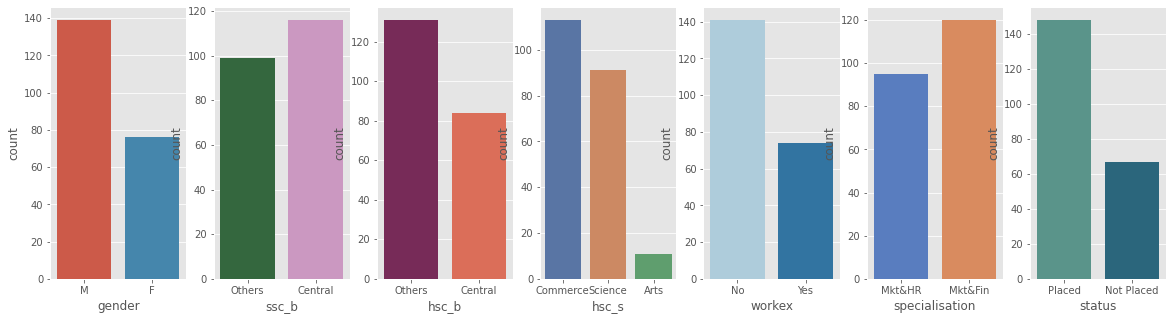

In [12]:
fig,axs = plt.subplots(ncols=7,figsize=(20,5))
sns.countplot(placementdata['gender'], ax = axs[0])
sns.countplot(placementdata['ssc_b'], ax = axs[1], palette="cubehelix")
sns.countplot(placementdata['hsc_b'], ax = axs[2], palette="rocket")
sns.countplot(placementdata['hsc_s'], ax = axs[3], palette="deep")
sns.countplot(placementdata['workex'], ax = axs[4], palette="Paired")
sns.countplot(placementdata['specialisation'], ax = axs[5], palette="muted")
sns.countplot(placementdata['status'], ax = axs[6],palette="crest")

In [13]:
gender_placed = placementdata.stb.freq(['gender', 'status'])
gender_placed[gender_placed['status'] == 'Placed']

,gender,status,count,percent,cumulative_count,cumulative_percent
0,M,Placed,100,46.511628,100,46.511628
1,F,Placed,48,22.325581,148,68.837209


In [14]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=gender_placed[gender_placed['status'] == 'Placed']['gender'],
    y=gender_placed[gender_placed['status'] == 'Placed']['count'],
    name='Placed',
    marker_color='green'
))

fig.add_trace(go.Bar(
    x=gender_placed[gender_placed['status'] == 'Not Placed']['gender'],
    y=gender_placed[gender_placed['status'] == 'Not Placed']['count'],
    name='Not placed',
    marker_color='indianred'
))
fig.update_layout(barmode='group', title='Placement by Gender')

fig.show()

In [16]:
stream_placed = placementdata.stb.freq(['hsc_s','status'])
stream_placed[stream_placed['status']=='Placed']

,hsc_s,status,count,percent,cumulative_count,cumulative_percent
0,Commerce,Placed,79,36.744186,79,36.744186
1,Science,Placed,63,29.302326,142,66.046512
4,Arts,Placed,6,2.790698,210,97.674419


In [17]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=stream_placed[stream_placed['status'] == 'Placed']['hsc_s'],
    y=stream_placed[stream_placed['status'] == 'Placed']['count'],
    name='Placed',
    marker_color='pink'
))

fig.add_trace(go.Bar(
    x=stream_placed[stream_placed['status'] == 'Not Placed']['hsc_s'],
    y=stream_placed[stream_placed['status'] == 'Not Placed']['count'],
    name='Not placed',
    marker_color='red'
))
fig.update_layout(barmode='group', title='Placements offerred on the basis of Streams')

fig.show()

In [18]:
degree_placed = placementdata.stb.freq(['degree_t','status'])
degree_placed[degree_placed['status']=='Placed']

,degree_t,status,count,percent,cumulative_count,cumulative_percent
0,Comm&Mgmt,Placed,102,47.441860,102,47.441860
2,Sci&Tech,Placed,41,19.069767,186,86.511628
5,Others,Placed,5,2.325581,215,100.000000


In [19]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=degree_placed[degree_placed['status'] == 'Placed']['degree_t'],
    y=degree_placed[degree_placed['status'] == 'Placed']['count'],
    name='Placed',
    marker_color='red'
))

fig.add_trace(go.Bar(
    x=degree_placed[degree_placed['status'] == 'Not Placed']['degree_t'],
    y=degree_placed[degree_placed['status'] == 'Not Placed']['count'],
    name='Not placed',
    marker_color='pink'
))
fig.update_layout(barmode='group', title='Placement by Degree')

fig.show()

In [20]:
placementdata.stb.freq(['status'], value='ssc_p')
scores = placementdata[['ssc_p','hsc_p','degree_p','mba_p','status']]
avg_placed_perecent = scores[scores['status']=='Placed']
avg_not_placed_perecent = scores[scores['status']=='Not Placed']

In [21]:

fig = go.Figure([go.Bar(x=avg_placed_perecent.drop('status',axis='columns').columns, 
             y=avg_placed_perecent.drop('status',axis='columns').mean(),
            marker_color=px.colors.sequential.Aggrnyl,
            name='Placed')])

fig.add_trace(go.Bar(
    x=avg_not_placed_perecent.drop('status',axis='columns').columns,
    y=avg_not_placed_perecent.drop('status',axis='columns').mean(),
    marker_color=px.colors.sequential.Magenta,
    name='Not Placed'
))
fig.update_layout(barmode='group', title='Average Percntage of Placed & Non Placed Students')
fig.show()

In [22]:
exp = placementdata.stb.freq(['workex','status'])

In [24]:
fig = go.Figure([go.Bar(x=exp[exp['workex'] == 'Yes']['status'], 
             y=exp[exp['workex'] == 'Yes']['count'],
            marker_color=px.colors.sequential.Tealgrn_r,
            name='Experianced')])

fig.add_trace(go.Bar(
    x=exp[exp['workex'] == 'No']['status'],
    y=exp[exp['workex'] == 'No']['count'],
    marker_color=px.colors.sequential.Rainbow_r,
    name='Not Experianced'
))
fig.update_layout(barmode='group', title='Experience By Placement Status')
fig.show()

In [25]:
specs_status = placementdata.stb.freq(['specialisation','status'])
specs_status

,specialisation,status,count,percent,cumulative_count,cumulative_percent
0,Mkt&Fin,Placed,95,44.186047,95,44.186047
1,Mkt&HR,Placed,53,24.651163,148,68.837209
2,Mkt&HR,Not Placed,42,19.534884,190,88.372093
3,Mkt&Fin,Not Placed,25,11.627907,215,100.000000


In [26]:
fig = go.Figure([go.Bar(x=specs_status[specs_status['status']=='Placed']['specialisation'], 
             y=specs_status[specs_status['status']=='Placed']['count'],
            marker_color=px.colors.sequential.Mint_r,
            name='Placed')])

fig.add_trace(go.Bar(
    x=specs_status[specs_status['status']=='Not Placed']['specialisation'],
    y=specs_status[specs_status['status']=='Not Placed']['count'],
    marker_color=px.colors.sequential.Brwnyl_r,
    name='Not Placed'
))
fig.update_layout(barmode='group', title='Placement by Specialisation')
fig.show()

# Copying the data to new variable

In [27]:
placementdata1 = placementdata.copy()

In [28]:
placementdata.isna().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

In [29]:
placementdata1 = placementdata.copy()
placementdata = placementdata.fillna(0)
placementdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# Heatmap

A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space

In [30]:
placementdata = placementdata.drop(['sl_no'], axis = 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
placementdata['gender'] = le.fit_transform(placementdata['gender'])
placementdata['ssc_b'] = le.fit_transform(placementdata['ssc_b'])
placementdata['workex'] = le.fit_transform(placementdata['workex'])
placementdata['specialisation'] = le.fit_transform(placementdata['specialisation'])
placementdata['status'] = le.fit_transform(placementdata['status'])
placementdata['hsc_b'] = le.fit_transform(placementdata['hsc_b'])
placementdata['hsc_s'] = le.fit_transform(placementdata['hsc_s'])
placementdata['degree_t'] = le.fit_transform(placementdata['degree_t'])

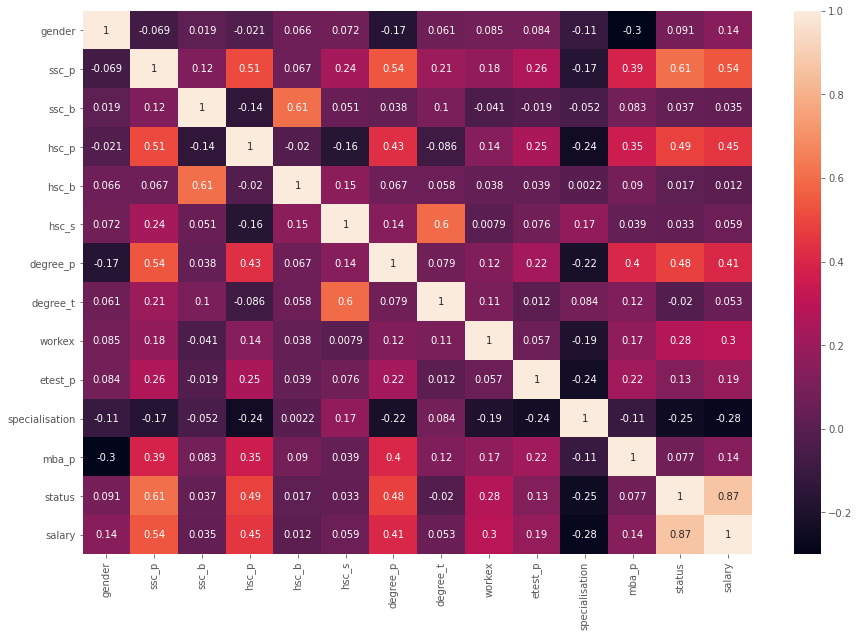

In [31]:
plt.figure(figsize=(15,10))
corr = placementdata.corr()
sns.heatmap(corr, annot = True)

# 3.Feature Selection

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

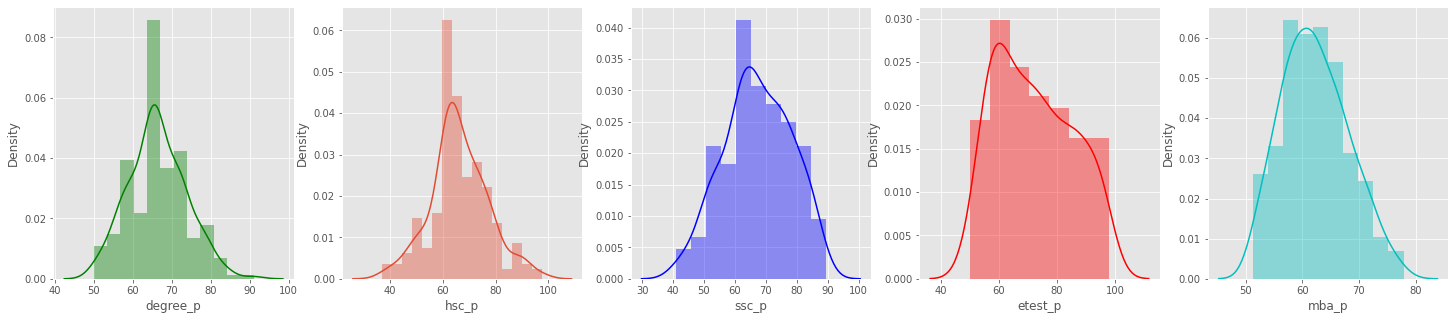

In [32]:
fig, axs = plt.subplots(ncols=5,figsize=(25,5))
sns.distplot(placementdata1['degree_p'], ax= axs[0], color = 'g')
sns.distplot(placementdata1['hsc_p'], ax= axs[1])
sns.distplot(placementdata1['ssc_p'],  ax= axs[2], color = 'b')
sns.distplot(placementdata1['etest_p'],  ax= axs[3], color = 'r')
sns.distplot(placementdata1['mba_p'],  ax= axs[4], color = 'c')

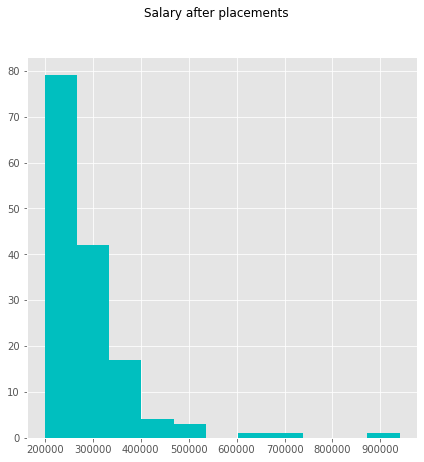

In [33]:
plt.figure(figsize=(7,7))
plt.hist(placementdata1['salary'], bins = 11,color="c")
plt.suptitle('Salary after placements')
plt.show()

In [34]:
placementdata = pd.DataFrame(placementdata)

In [35]:
placementdata_placed = placementdata1[placementdata1['status'] == 'Placed']

In [36]:
placementdata2 = placementdata_placed.groupby(['degree_t','degree_p','mba_p','specialisation','hsc_p', 'hsc_s','salary', 'workex']).sum().sort_values(by ='salary')
placementdata2

sl_no  ...  etest_p
degree_t  degree_p mba_p specialisation hsc_p hsc_s    salary   workex         ...         
Comm&Mgmt 69.00    64.66 Mkt&Fin        75.00 Commerce 200000.0 Yes        16  ...    72.00
                   65.63 Mkt&HR         56.00 Science  200000.0 No        136  ...    55.60
Sci&Tech  77.48    66.28 Mkt&Fin        78.33 Science  200000.0 Yes         2  ...    86.50
Comm&Mgmt 81.00    69.70 Mkt&Fin        73.00 Commerce 200000.0 Yes        45  ...    89.00
          68.40    62.98 Mkt&HR         73.20 Science  200000.0 No         51  ...    65.00
...                                                                       ...  ...      ...
Sci&Tech  64.27    66.23 Mkt&Fin        50.83 Science  500000.0 Yes       175  ...    64.00
          64.00    66.46 Mkt&Fin        67.00 Science  500000.0 No        164  ...    75.00
Comm&Mgmt 79.00    70.81 Mkt&Fin        97.00 Commerce 650000.0 Yes       178  ...    89.00
Sci&Tech  58.00    61.30 Mkt&Fin        58.66 Science  690000.0 Yes       151  ...    56.00
Comm&Mgmt 64.60    64.34 Mkt&Fin        68.40 Commerce 940000.0 Yes       120  ...    82.66

[148 rows x 3 columns]

In [37]:
placementdata_np = placementdata1[placementdata1.status == 'Not Placed']

In [38]:
placementdata3 = placementdata_np.groupby(['degree_t','degree_p','mba_p','specialisation','hsc_p', 'hsc_s','workex']).sum().sort_values(by ='degree_p')
placementdata3

sl_no  ...  salary
degree_t  degree_p mba_p specialisation hsc_p hsc_s    workex         ...        
Comm&Mgmt 50.0     54.96 Mkt&HR         47.00 Commerce No         15  ...     0.0
          50.2     65.33 Mkt&Fin        54.60 Commerce Yes        26  ...     0.0
          50.8     62.79 Mkt&HR         57.00 Commerce No         92  ...     0.0
Sci&Tech  52.0     59.43 Mkt&HR         52.00 Science  No          4  ...     0.0
Others    52.0     62.77 Mkt&HR         51.00 Science  No         35  ...     0.0
...                                                              ...  ...     ...
Sci&Tech  72.7     59.24 Mkt&HR         47.00 Commerce No         69  ...     0.0
Comm&Mgmt 74.0     60.44 Mkt&Fin        67.00 Commerce No         83  ...     0.0
                   74.56 Mkt&Fin        78.33 Commerce No        166  ...     0.0
          77.5     67.00 Mkt&HR         62.00 Commerce No         76  ...     0.0
          79.0     53.29 Mkt&Fin        49.20 Commerce No          7  ...     0.0

[67 rows x 4 columns]

# 4. Classifier Accuracy

The accuracy of a classifier is given as the percentage of total correct predictions divided by the total number of instances. If the accuracy of the classifier is considered acceptable, the classifier can be used to classify future data tuples for which the class label is not known.

In [39]:
accuracies=dict()

In [40]:
X = placementdata.drop(['status'], axis = 1)
y = placementdata['status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
accuracies['KNN Algorithm']= accuracy_score(y_test,y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test,y_pred)))

Confusion Matrix:
[[12  1]
 [ 1 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.98      0.98      0.98        41

    accuracy                           0.96        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.96      0.96      0.96        54

Accuracy is: 0.9629629629629629


# Logistic Regression-Accuracy

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.

In [56]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [57]:
placementdata = pd.read_csv("placement.csv")
placementdata.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [58]:
data1 = placementdata
#Gender Column
data1['gender']=data1['gender'].replace('M',0)
data1['gender']=data1['gender'].replace('F',1)
#SSC_B column
data1['ssc_b']=data1['ssc_b'].replace('Central',0)
data1['ssc_b']=data1['ssc_b'].replace('Others',1)
#HSC_B column
data1['hsc_b']=data1['hsc_b'].replace('Central',0)
data1['hsc_b']=data1['hsc_b'].replace('Others',1)
#HSC_S column
data1['hsc_s']=data1['hsc_s'].replace('Commerce',0)
data1['hsc_s']=data1['hsc_s'].replace('Science',1)
data1['hsc_s']=data1['hsc_s'].replace('Arts',1)
#degree_t column
data1['degree_t']=data1['degree_t'].replace('Comm&Mgmt',0)
data1['degree_t']=data1['degree_t'].replace('Sci&Tech',1)
data1['degree_t']=data1['degree_t'].replace('Others',1)                                   
#workex column
data1['workex']=data1['workex'].replace('Yes',0)
data1['workex']=data1['workex'].replace('No',1)
#specialisation column
data1['specialisation']=data1['specialisation'].replace('Mkt&Fin',0)
data1['specialisation']=data1['specialisation'].replace('Mkt&HR',1)
#stats column
data1['status']=data1['status'].replace('Placed',0)
data1['status']=data1['status'].replace('Not Placed',1)

In [59]:
data1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,1,0,58.00,1,1,55.0,1,58.80,0,270000.0
1,2,0,79.33,0,78.33,1,1,77.48,1,0,86.5,0,66.28,0,200000.0
2,3,0,65.00,0,68.00,0,1,64.00,0,1,75.0,0,57.80,0,250000.0
3,4,0,56.00,0,52.00,0,1,52.00,1,1,66.0,1,59.43,1,NaN
4,5,0,85.80,0,73.60,0,0,73.30,0,1,96.8,0,55.50,0,425000.0


In [60]:
data1=data1.drop(columns=['salary','sl_no'])

In [61]:
data1.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
gender,1.000000,0.068969,-0.019429,0.021334,-0.065945,-0.001087,0.173217,-0.036215,0.085153,-0.084294,0.106160,0.300531,0.090670
ssc_p,0.068969,1.000000,0.116194,0.511472,0.066996,0.101323,0.538404,0.179581,-0.175675,0.261993,-0.172536,0.388478,-0.607889
ssc_b,-0.019429,0.116194,1.000000,-0.137013,0.605883,0.056671,0.038070,0.094939,0.040744,-0.018991,-0.051565,0.083120,-0.037297
hsc_p,0.021334,0.511472,-0.137013,1.000000,-0.019548,-0.258093,0.434206,-0.112816,-0.141025,0.245113,-0.241630,0.354823,-0.491228
hsc_b,-0.065945,0.066996,0.605883,-0.019548,1.000000,0.073522,0.067229,0.027440,-0.038357,0.039108,0.002232,0.090201,-0.016945
hsc_s,-0.001087,0.101323,0.056671,-0.258093,0.073522,1.000000,0.022724,0.651804,-0.056719,0.021732,0.129985,0.049415,0.024414
degree_p,0.173217,0.538404,0.038070,0.434206,0.067229,0.022724,1.000000,0.032755,-0.122648,0.224470,-0.218286,0.402364,-0.479861
degree_t,-0.036215,0.179581,0.094939,-0.112816,0.027440,0.651804,0.032755,1.000000,-0.102517,0.012531,0.101331,0.102088,0.046849
workex,0.085153,-0.175675,0.040744,-0.141025,-0.038357,-0.056719,-0.122648,-0.102517,1.000000,-0.056735,0.191174,-0.168811,0.276060
etest_p,-0.084294,0.261993,-0.018991,0.245113,0.039108,0.021732,0.224470,0.012531,-0.056735,1.000000,-0.236315,0.218055,-0.127639


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data1.drop(columns=['status'])
y = data1.status

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
accuracies['Logistic Regression']=model.score(X_test,y_test)
print('Accuracy is: ' + str(model.score(X_test,y_test)))

Accuracy is: 0.8837209302325582


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=12,max_depth=8, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracies['Random Tree Classification']=accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

Accuracy is: 0.7906976744186046


In [66]:
accuracy_data = pd.DataFrame(list(accuracies.items()), columns=['Model Name','Accuracy Score'])
accuracy_data

,Model Name,Accuracy Score
0,KNN Algorithm,0.962963
1,Logistic Regression,0.883721
2,Random Tree Classification,0.790698


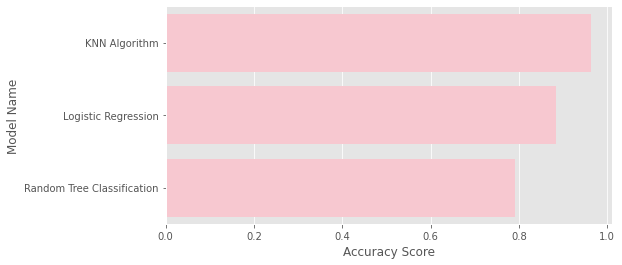

In [67]:
f, ax = plt.subplots(figsize=(8, 4))
sns.set_color_codes('pastel')
sns.barplot(y='Model Name', x='Accuracy Score', data=accuracy_data, color='pink')
plt.show()

# Support Vector Machine

SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[29  2]
 [ 3  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.82      0.75      0.78        12

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



# Cross Validation Model

The goal of cross-validation is to estimate the expected level of fit of a model to a data set that is independent of the data that were used to train the model. It can be used to estimate any quantitative measure of fit that is appropriate for the data and model.

In [69]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import cross_val_score
gnb = BernoulliNB() 
gnb.fit(X_train, y_train) 
  
#Applying and predicting 
y_pred = gnb.predict(X_test) 
cv_scores = cross_val_score(gnb, X, y, 
                            cv=10,
                            scoring='precision')
print("Cross-validation precision: %f" % cv_scores.mean())

Cross-validation precision: 0.477500
